In [1]:
!pip install torch
!pip install torchvision
!pip install tqdm
!pip install matplotlib

You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\tim599\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


# 第一個人工智慧程式

## 引用函式庫
----

In [2]:
import torch #主函式庫

import torch.nn as nn #定義模型架構
import torch.nn.functional as F #定義某些演算法

from torch.utils.data import Dataset, DataLoader #定義資料引入的工具
from torch.optim import Adam #定義最佳化演算法工具

from torchvision import transforms, datasets #支援影像處理的工具
from tqdm import tqdm #執行狀況的競渡條

import matplotlib.pyplot as plt #圖形化工具
import numpy as np #矩陣處理工具


c:\users\tim599\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 訓練數據集設定
----

In [3]:
Download_data = True    #第一次用要先下載data,所以是True
train_data = datasets.MNIST(
    root = './mnist/',
    train = True,
    transform = transforms.ToTensor(), 
    # 把灰階從0~255壓縮到0~1
    download = Download_data
)
Download_data = False

In [4]:
test_data = datasets.MNIST(
    root = './mnist/', 
    train=False,
    transform = transforms.ToTensor(),
    download = Download_data,
    )

## 顯示資料
----

C:\Users\Tim599\AppData\Local\Temp\ipykernel_14460\1880337691.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  img = torch.tensor(train_data.data[num], dtype = torch.float)


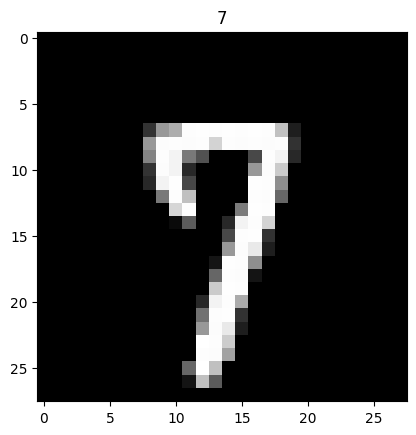

In [5]:
num = 888

img = torch.tensor(train_data.data[num], dtype = torch.float)

#呼叫圖形化工具
plt.imshow(img,cmap='gray')
plt.title('%i' % train_data.targets[num])
plt.show()


## 設定資料讀取
----

In [14]:
batch_size = 256           #每次訓練隨機丟64張圖像進去

train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=True )

for data, label in train_loader:
    print(type(data))
    print("data  =>", data.size())
    print ("label => torch.Size", ([batch_size]))
    break    

<class 'torch.Tensor'>
data  => torch.Size([256, 1, 28, 28])
label => torch.Size [256]


## 模型定義
----

In [7]:
class First_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x, inplace = True)
        x = self.fc2(x)
        x = F.relu(x, inplace = True)
        x = self.fc3(x)
        x = F.relu(x, inplace = True)
        x = self.fc4(x)
        x = F.relu(x, inplace = True)
        x = self.fc5(x)
        x = F.relu(x, inplace = True)        
        x = F.softmax(x, dim = 1)
        return x

model = First_model()

In [8]:
print (model)
for data, label in train_loader:
    print(type(data))
    print(data.size())
    results = model(data)
    print(results.size())
    print(results[0])
    break

First_model(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=64, bias=True)
  (fc5): Linear(in_features=64, out_features=10, bias=True)
)
<class 'torch.Tensor'>
torch.Size([256, 1, 28, 28])
torch.Size([256, 10])
tensor([0.0987, 0.1002, 0.0987, 0.0987, 0.0987, 0.1013, 0.0989, 0.1067, 0.0995,
        0.0987], grad_fn=<SelectBackward0>)


## 損失函數以及優化演算法定義
___

In [ ]:
lrr =0.001

loss_F = nn.CrossEntropyLoss()

opti = Adam(model.parameters(), lr = lrr)


## 訓練流程
----

In [ ]:
epochs = 50                #全部data訓練10次

losses = []

for epoch in tqdm(range(epochs)):
    running_loss = []
    for idx, (data, labels) in enumerate(train_loader):
        results = model(data)
        # labels = torch.tensor(F.one_hot(labels, num_classes = 10).clone().detach(), dtype = torch.float)
        # print(labels)
        opti.zero_grad()
        #optimizer
        loss = loss_F(results, labels)

        #spreading backward
        loss.backward()
        #reload the optimizer
        opti.step()
        running_loss.append(loss.item())
    avg_losses = np.mean(running_loss)
    losses.append(avg_losses)
    print(f"epoch:{epoch}, avg_loss:{avg_losses}")


## 顯示訓練圖表
----

In [ ]:
plt.ylabel("loss_value")
plt.xlabel("epochs")
plt.plot(losses)
plt.title("training loss")
plt.show()

## 測試模型 + 混淆矩陣展示
----

In [ ]:
# 設定模型模式為驗證模式。
model.eval()
acc_lst = []
# 設定類別數量
num_classes = 10

# 混淆矩陣設定
conf_matrix = torch.zeros(num_classes, num_classes)

# 使pytorch運算時，取消梯度運算
with torch.no_grad():
    for idx, (data, label) in enumerate(test_loader):
        outputs = model(data)
        prob, class_results = torch.max(outputs, 1)
        
        # 計算混肴矩陣的位置
        for target, pred in zip(label, class_results):
            conf_matrix[target, pred] += 1
            
        # 設定過濾答案判斷的判斷式
        corr = (class_results == label)
        acc = len(class_results[corr]) / len(class_results)
        acc_lst.append(acc)
        
        
print(f"avg_acc => {np.mean(acc_lst)}")


In [ ]:
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
classes = [i for i in range(num_classes)]

classes = []
for i in range(num_classes):
    classes.append(i)

thresh = conf_matrix.max() / 2	#數值顏色閾值，如果數值超過這個，就顏色加深。
for x in range(num_classes):
    for y in range(num_classes):
        # 注意這裡的matrix[y, x]不是matrix[x, y]
        info = int(conf_matrix[y, x])
        plt.text(x, y, info,
                 verticalalignment='center',
                 horizontalalignment='center',
                 color="white" if info > thresh else "black")
                 
plt.tight_layout() #保證圖不重疊
plt.title("Confusion Matrix")
plt.yticks(range(len(classes)), classes)
plt.xticks(range(len(classes)), classes,rotation=45)
plt.xlabel("Pridict")
plt.ylabel("Anser")
plt.show()
plt.close()